>Jacob Lustig-Yaeger

# Spectral lines from the solar atmosphere  

We now turn to the formation of spectral lines in the solar spectrum. We will concentrate on the formation of the Na I D1 line at $\lambda=589.6$ nm.  

## 1. Observed Na D line profiles  

* **Pull the data that went into making Figure 8 (Rutten B labs) over from `ftp://vso.nso.edu/pub/atlas/visatl`. Concatenate the files covering the two Na I D lines (sp16900 and sp16950) into a single file, deleting the overlaps.**  

>First, we'll import modules and assign important variables

In [14]:
# Import some fundamental python packages
%matplotlib inline
import numpy as np; import scipy as sp; import matplotlib as mpl
import matplotlib.pyplot as plt; from matplotlib import gridspec
from matplotlib import rc; from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=25, usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}); mpl.rcParams['font.size'] = 25.0
import jakely

# Define some physical constants in CGS
h = 6.62607e-27       # Planck constant (erg s)
c = 2.998e10          # Speed of light (cm / s)
k = 1.3807e-16        # Boltzmann constant (erg / K)
mH = 1.67352e-24      # Mass of H (g)
mHe = 3.97 * mH       # Mass of He (g)
Rsun = 6.96e10        # Solar Radius (cm)
Msun = 1.989e33       # Solar Mass (g)
G = 6.67e-8           # Gravitational constant
ec = 4.8032e-10       # Electron charge (esu)
Me = 9.1093e-28       # Mass of electron (g)

>The file columns, specified in the README on the server, are as follows: first the **frequency**, second the deduced **telluric spectrum**, third the **observed photospheric spectrum before correction** for telluric absorption, and fourth the **photospheric spectrum corrected for telluric absorption**.

In [2]:
! head sp16900

  16897.000  0.93269E+00  0.92475E+00  0.99148E+00
  16897.020  0.93925E+00  0.92890E+00  0.98897E+00
  16897.039  0.94966E+00  0.93672E+00  0.98637E+00
  16897.061  0.96153E+00  0.94633E+00  0.98419E+00
  16897.080  0.97269E+00  0.95586E+00  0.98269E+00
  16897.100  0.98188E+00  0.96419E+00  0.98198E+00
  16897.119  0.98792E+00  0.97014E+00  0.98200E+00
  16897.141  0.99109E+00  0.97396E+00  0.98272E+00
  16897.160  0.99217E+00  0.97645E+00  0.98415E+00
  16897.180  0.99209E+00  0.97839E+00  0.98620E+00


In [3]:
# Read-in first file
NaID1a = np.genfromtxt('sp16900')

nu_a = NaID1a[:,0]
telluric_a = NaID1a[:,1]
obs_nocor_a = NaID1a[:,2]
obs_cor_a = NaID1a[:,3]

In [4]:
# Read-in second file
NaID1b = np.genfromtxt('sp16950')

nu_b = NaID1b[:,0]
telluric_b = NaID1b[:,1]
obs_nocor_b = NaID1b[:,2]
obs_cor_b = NaID1b[:,3]

In [5]:
# Concatenate data
print jakely.toolbox.find_nearest(nu_b, nu_a[-1])

nu = np.hstack([nu_a, nu_b[301:]])
telluric = np.hstack([telluric_a, telluric_b[301:]])
obs_ncor = np.hstack([obs_nocor_a, obs_nocor_b[301:]])
obs_cor = np.hstack([obs_cor_a, obs_cor_b[301:]])

300


* **Write IDL code to read these data. You need the first and third columns (see the README).**  
>Already did this :)  

## 2. Na D wavelengths  

* **Plot the solar Na I D lines against vacuum wavelength at various dispersions.**  

>The README states: The required multiplicative factors to correct the observed frequencies to the laboratory scale are 1.0000013 for 13,500 to 16,000 cm-1, 0.9999981 for 16,000 to 20,000 cm-1, and 1.0000018 for 20,000 to 28,000 cm-1.

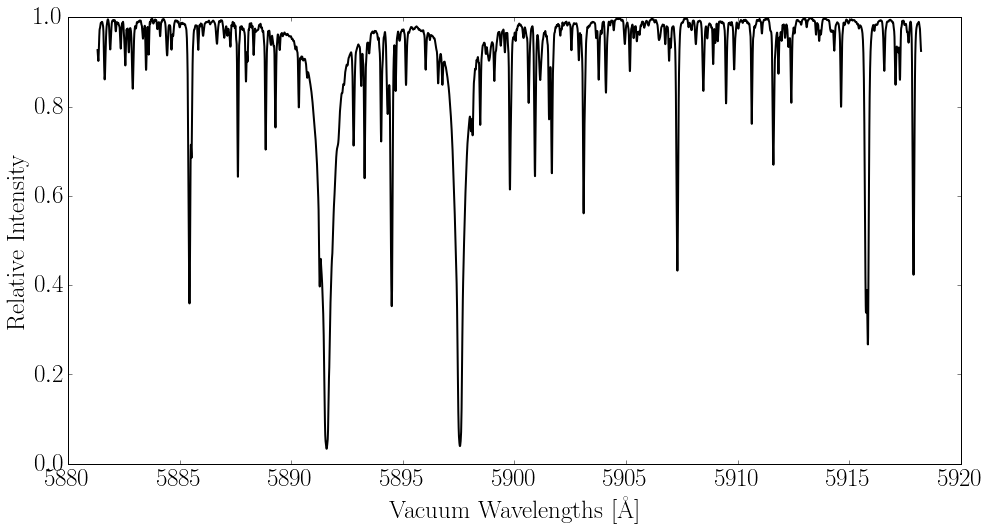

In [6]:
# Scale wavenumbers to vacuum
vacfact = 0.9999981
nu_vac = nu * vacfact

# Convert to wavelengths
wlv = (1./nu_vac) * 1e8  # (Angstroms)

# Plot
fig = plt.figure(figsize=(16,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(wlv,obs_ncor, lw=2.0, c='k')       
ax0.set_xlabel(r"Vacuum Wavelengths [\AA]")
ax0.set_ylabel(r"Relative Intensity")
plt.show()

* **Find the vacuum wavelengths of their minima (use the IDL where and min functions).**

In [7]:
min1 = wlv[jakely.toolbox.find_nearest(obs_ncor, np.min(obs_ncor[(wlv>5890) & (wlv<5895)]))]
print 'vacuum wavelength of first minimum:', min1, 'Angstroms'

min2 = wlv[jakely.toolbox.find_nearest(obs_ncor, np.min(obs_ncor[(wlv>5895) & (wlv<5900)]))]
print 'vacuum wavelength of second minimum:', min2, 'Angstroms'

vacuum wavelength of first minimum: 5891.58930683 Angstroms
vacuum wavelength of second minimum: 5897.56596122 Angstroms


* **Check that the Na I D wavelengths tabulated in the solar spectrum line list of Moore et al. (1966) (computer-readable at ftp://vso.nso.edu/pub/atlas/linelist/Moore) are $\lambda = 5895.94$ Angstroms for NaI D1 and $\lambda = 5889.97$ Angstroms for NaI D2, respectively. Check the identification of a few blends (other lines) in Figure 8 with the entries in this table.**

>`5889.973M   *   752.   120.SS       NA 1(D2)     0.00    1`  
>`5895.940M   *   564.    91.S        NA 1(D1)     0.00    1`  
>`5892.883S       66.    11.S         NI 1         1.99    68`


* **The Astrolib routines airtovac and vactoair convert air into vacuum wavelengths and vice versa. A reasonably accurate transformation is also given by  
$$ \lambda_{air} = 0.99972683 \lambda_{vac} + 0.0107 - \frac{196.25}{\lambda_{vac}} $$  
with both wavelength’s in angstroms, from Neckel 1999. Use this equation or routine `vactoair` to plot the Na I D lines against air wavelength.**

In [8]:
def vactoair(lamvac):
    return 0.99972683 * lamvac + 0.0107 - 196.25 / lamvac

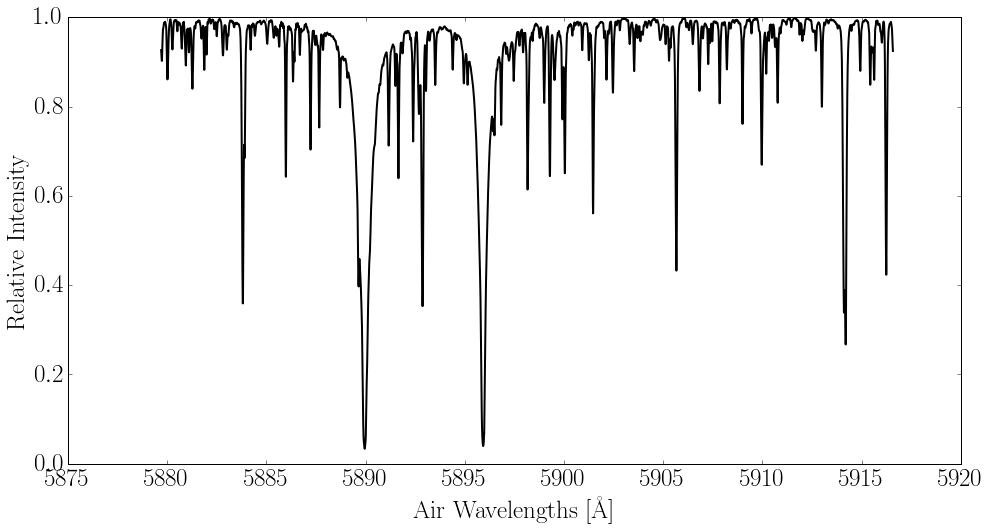

In [9]:
wlair = vactoair(wlv) 

# Plot
fig = plt.figure(figsize=(16,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(wlair,obs_ncor, lw=2.0, c='k')       
ax0.set_xlabel(r"Air Wavelengths [\AA]")
ax0.set_ylabel(r"Relative Intensity")
plt.show()

In [60]:
lamD2 = wlair[jakely.toolbox.find_nearest(obs_ncor, np.min(obs_ncor[(wlair>5880) & (wlair<5893)]))]
print 'air wavelength of Na D2:', lamD2, 'Angstroms'

lamD1 = wlair[jakely.toolbox.find_nearest(obs_ncor, np.min(obs_ncor[(wlair>5893) & (wlair<5900)]))]
print 'air wavelength of Na D1:', lamD1, 'Angstroms'

air wavelength of Na D2: 5889.95729118 Angstroms
air wavelength of Na D1: 5895.93234669 Angstroms


## 3. LTE line formation  

We will now compute the solar Na I D1 line assuming the FALC model atmosphere and LTE for the line source function. Since LTE holds already for the continuum processes at these wavelengths (being dominated by H- bound-free transitions), the assumption of LTE line formation implies that you can simply set Sl = Sc = Stotal = B(T).

**What remains is first to evaluate the line extinction as a function of height and wavelength, and then to add that to the continuous extinction in the integration loop of the previous exercise. The outer loop over wavelength then has to sample the Na I D1 profile.**

## 4. Line extinction  

The monochromatic line extinction per cm path length for a bound-bound transition between a lower level $l$ and an upper level $u$ is given by:  
$$ \alpha^{l}_{\lambda} = \frac{\sqrt{\pi}e^2}{m_e c} \frac{\lambda^2}{c} b_l \frac{n^{LTE}_l}{N_E} N_H A_E f_{lu} \frac{H(a,v)}{\Delta \lambda_D} \left [ 1 - \frac{b_u}{b_l} e^{-hc / \lambda k T} \right ] $$  
which holds generally when the line broadening is described by the Voigt function $H(a,v)$. For LTE the population departure coefficients of the lower and upper levels are $b_l = b_u = 1$. The LTE population fraction $n^{LTE}_l/N_E$ (lower level population scaled by the total element population) is given by the combined Saha and Boltzmann distributions. 

In [54]:
def dlamD(lam0, T, vt):
    mNa =  22.99*1.6605e-24
    return (lam0 / c) * np.sqrt(2. * k * T / mNa  + vt**2)

def unitless_lam(lam, lam0, T, vt):
    return (lam-lam0) / dlamD(lam0, T, vt)

In [61]:
def extline(lam, line='D1'):
    
    # Set parameters based on whether the use wants the Na D1 or D2 line
    if line == 'D1':
        # set lam0, flu, gl,gu
        lam0 = lamD1
        f = 0.318
        gl = 2.0
        gu = 2.0
    elif line == 'D2':
        # set lam0, flu, gl,gu
        lam0 = lamD2
        f = 0.631
        gl = 2.0
        gu = 4.0
    else:
        print "Error in extline: Only 'D1' and 'D2' can be used with kwarg 'line'."
        return -1
    
    # Compute coupled Saha-Boltzmann LTE population level fraction
    sahabolt = sahabolt_Na(temp,elpress,ion,level)
    
    # Compute voigt damping parameter
    a = gamma_vdw(Z,chi,lam,T,Pg) # + gamma_rad(lam, gl, gu, f)
    
    # Compute Delta Wavelength & unitless wavelength
    dlam = dlamD(lam0, T, vt)
    u = (lam-lam0) / dlam
    
    # Compute voigt function
    H = voigt(a,u)
    
    # retrun monochromatic line extinction per cm path length
    return np.pi * ec**2 * lam**2 / (Me * c**2) * (sahabolt) * (ANa * NH) * f * (H/dlam)* (1.0 * -np.exp(-h*c/(lam*k*T)))

In [11]:
# Sodium ionization energies
chiion = [5.139, 47.29, 71.64]

# Statistical weights
g = [2,2,4]  # [g1, D1, D2]

# Oscillator strengths
flu = [0.318, 0.631] # [D1, D2]

# Partition functions
def NaI_part(T):
    theta = 5040./T
    c0 =0.30955
    c1 =-0.17778 
    c2 = 1.10594 
    c3 = 2.42847 
    c4 = 1.70721
    logU = c0 + c1*np.log10(theta) + c2*np.log10(theta)**2 + c3*np.log10(theta)**3 + c4*np.log10(theta)**4
    return 10.**logU
def NaII_part():
    return 1.0
def NaIII_part():
    return 6.0

ANa = 1.74e-6 # NNa/NH

In [12]:
# Functions from Rutten Lab A2

def partfunc_E(temp):
    # partition functions Schadee element
    # input: temp (K)
    # output: fltarr(4) = partition functions U1,..,U4
    u=np.zeros(4)
    chiion=np.array([7,16,31,51])
    k=8.61734e-5
    for r in range(0,4):
        for s in range(0, chiion[r]): 
            u[r]=u[r] + np.exp(-s/(k*temp))
    return u

def partfunc_Na(temp):
    return np.array([NaI_part(temp), NaII_part(), NaIII_part()])

def boltz_E(temp,r,s):
    # compute Boltzmann population for level r,s of Schadee element E
    # input: temp (temperature, K)
    #     r (ionization stage nr, 1 - 4 where 1 = neutral E)
    #     s (level nr, starting at s=1)
    # output: relative level population n_(r,s)/N_r
    u=partfunc_E(temp)
    keV=8.61734e-5
    # Boltzmann constant in ev/deg
    relnrs = 1./u[r-1]*np.exp(-(s-1)/(keV*temp))
    return relnrs

def boltz_Na(temp,r,s):
    # compute Boltzmann population for level r,s of Schadee element E
    # input: temp (temperature, K)
    #     r (ionization stage nr, 1 - 4 where 1 = neutral E)
    #     s (level nr, starting at s=1)
    # output: relative level population n_(r,s)/N_r
    u=partfunc_Na(temp)
    keV=8.61734e-5
    # Boltzmann constant in ev/deg
    relnrs = 1./u[r-1]*np.exp(-(s-1)/(keV*temp))
    return relnrs

def saha_E(temp,elpress,ionstage):
    # compute Saha population fraction N_r/N for Schadee element E
    # input: temperature, electron pressure, ion stage
    # physics constants
    kerg=1.380658e-16   # Boltzmann constant (erg K; double precision)
    kev=8.61734e-5      # Boltzmann constant (eV/deg)
    h=6.62607e-27       # Planck constant (erg s)
    elmass=9.109390e-28 # electron mass (g)
    # kT and electron density
    kevT=kev*temp
    kergT=kerg*temp
    eldens=elpress/kergT
    chiion=np.array([7,16,31,51]) # ionization energies for element E
    u=partfunc_E(temp)            # get partition functions U[0]...u[3]
    u=np.hstack([u,2])                       # add estimated fifth value to get N_4 too
    sahaconst=(2*np.pi*elmass*kergT/(h*h))**1.5 * 2./eldens
    nstage=np.zeros(5)     # double-precision float array
    nstage[0]=1.           # relative fractions only (no abundance)
    for r in range(0,4):
        nstage[r+1] = nstage[r]*sahaconst*u[r+1]/u[r]*np.exp(-chiion[r]/kevT)
    ntotal=np.sum(nstage)        # sum all stages = element density
    nstagerel=nstage/ntotal      # fractions of element density
    return nstagerel[ionstage-1] # ion stages start at 1, IDL at 0

def saha_Na(temp,elpress,ionstage):
    # compute Saha population fraction N_r/N for Schadee element E
    # input: temperature, electron pressure, ion stage
    # physics constants
    kerg=1.380658e-16   # Boltzmann constant (erg K; double precision)
    kev=8.61734e-5      # Boltzmann constant (eV/deg)
    h=6.62607e-27       # Planck constant (erg s)
    elmass=9.109390e-28 # electron mass (g)
    # kT and electron density
    kevT=kev*temp
    kergT=kerg*temp
    eldens=elpress/kergT
    chiion=np.array([5, 47, 72]) # ionization energies for element E
    u=partfunc_Na(temp)            # get partition functions U[0]...u[3]
    u=np.hstack([u,2])                       # add estimated fifth value to get N_4 too
    sahaconst=(2*np.pi*elmass*kergT/(h*h))**1.5 * 2./eldens
    nstage=np.zeros(4)     # double-precision float array
    nstage[0]=1.           # relative fractions only (no abundance)
    for r in range(0,3):
        nstage[r+1] = nstage[r]*sahaconst*u[r+1]/u[r]*np.exp(-chiion[r]/kevT)
    ntotal=np.sum(nstage)        # sum all stages = element density
    nstagerel=nstage/ntotal      # fractions of element density
    return nstagerel[ionstage-1] # ion stages start at 1, IDL at 0

def sahabolt_E(temp,elpress,ion,level):
    # compute Saha-Boltzmann populaton n_(r,s)/N for level r,s of E
    # input: temperature, electron pressure, ionization stage, level nr
    return saha_E(temp,elpress,ion) * boltz_E(temp,ion,level)

def sahabolt_Na(temp,elpress,ion,level):
    # compute Saha-Boltzmann populaton n_(r,s)/N for level r,s of E
    # input: temperature, electron pressure, ionization stage, level nr
    return saha_Na(temp,elpress,ion) * boltz_Na(temp,ion,level)

In [25]:
# Functions from Rutten Lab A3

# Define planck function
def planck(temp, wav):
    return (2. * h * c**2) / (wav**5) / (np.exp(h * c / (wav * k * temp)) - 1.0)  

def integrand(y,a,u):
    return np.exp(-y**2.) / ((u - y)**2. + a**2.)

# Define voigt function  
def voigt(a,u):
    integ = sp.integrate.quad(integrand, -np.inf, np.inf, args=(a,u))[0]
    return (a / np.pi) * integ

def profile(a,tau0,u, Ts=5700, Tl=4200, wav=5000e-8):
    # return a Schuster-Schwarzschild profile
    # input: a = damping parameter
    #     tau0 = SS layer thickness at line center
    #     u = wavelength array in Doppler units
    # output: int = intensity array
    I=np.zeros_like(u)
    usize=len(u)
    for i in range(usize):
        tau=tau0 * voigt(a,np.abs(u[i]))
        I[i]=planck(Ts,wav)*np.exp(-tau) + planck(Tl,wav)*(1.-np.exp(-tau))
    return I

## 5. Line broadening  

The Voigt function $H(a, v)$ describes the extinction profile shape.  

$$ m_{Na} = 22.99 \times 1.6605 \times 10^{-24} \text{ g} $$  

Since the FALC model reaches higher we might also add in natural broadening with:  

$$ \gamma_{rad} = A_{ul} = 6.67 \times 10^{13} \frac{g_l}{g_u} \frac{f_{lu}}{\lambda^2} \text{ s}^{-1} $$  

The classical evaluation recipe of Van der Waals broadening by Unsold 1955 is (cf. Warner 1967)  

$$ \log \gamma_{vdw} \approx 6.33 + 0.4 \log (\bar{r_u^2} - \bar{r_l^2}) + \log P_g - 0.7 \log T $$  

where the mean square radii $\bar{r^2}$ of the upper and lower level are usually estimated from the hydrogenic approximation of Bates and Damgaard (1948):  

$$ \bar{r^2} = \frac{n^{\star 2}}{2 Z^2} \left ( 5n^{\star 2} + 1 - 3l(l+1) \right ) $$  

with $\bar{r^2}$ measured in atomic units, $l$ the angular quantum number of the level and $n^{\star}$ its effective (hydrogen-like) principal quantum number given by  

$$ n^{\star 2} = R \frac{Z^2}{E_{\infty} - E_n} $$  

in which the Rydberg constant $R = 13.6 \text{ eV } = 2.18 \times 10^{-11}$ erg, $Z$ is the ionization stage (Z = 1 for Na I, Z = 2 for Na II, etc) and $E_{\infty} - E_n$ is the ionization energy from the level (compute the excitation energy of the upper level from the line-center wavenumber). The common Na I D1 and Na I D2 lower level (3s 2S1/2) has l = 0, the upper levels (3p 2P1/2 and 3p 2P3/2) have l = 1.

In [38]:
def n_star2(Z,chi,lam,T):
    ev2erg = 1.60218e-12
    return 2.18e-11 * Z**2 / (chi*ev2erg - (h*c/(lam*k*T)))

def r2_bar(Z,chi,lam,T,l):
    return n_star2(Z,chi,lam,T) / (2*Z**2) * (5.*n_star2(Z,chi,lam,T) + 1.0 - 3.*l*(l+1.))

def gamma_vdw(Z,chi,lam,T,Pg):
    ru2 = r2_bar(Z,chi,lam,T,1.0)
    rl2 = r2_bar(Z,chi,lam,T,0.0)
    logg_vdw = 6.33 + 0.4 * np.log10(ru2 - rl2) + np.log10(Pg) - 0.7 * np.log10(T)
    return 10**logg_vdw

def gamma_rad(lam, gl, gu, f):
    return 6.67e13 * (gl/gu) * f / (lam * 1e7)**2

In [51]:
print gamma_vdw(1.0, chiion[0], 5.88e-5, temp[x], pgas[x]), temp[x], pgas[x]
print gamma_rad(5.88e-5, 2.0,4.0, 0.6 )

7931.89880899 5060.0 32347.12
57875190.8927


## 6. Implementation  

* **Implement the above into a function that returns the line extinction at all heights of the FALC atmosphere, for example `NaD1_ext(wav,temp,eldens,nhyd,vmicro)`. It is best to make this a set of subroutines that process the atmospheric arrays in one go, without "`for ih=0,nh-1 do begin`" unrolling because that results in much slower execution.**

In [47]:
# Read-in FALC model
falc = np.genfromtxt('falc.dat', skip_header=4)
height = falc[:,0]
tau500 = falc[:,1]
colm = falc[:,2]
temp = falc[:,3]
vturb = falc[:,4] * 1e5 # cm/s
nhyd = falc[:,5]
nprot = falc[:,6]
nel = falc[:,7]
ptot = falc[:,8]
pgasptot = falc[:,9]
dens = falc[:,10]
pgas = pgasptot * ptot

In [80]:
def exthmin(wav,temp,eldens, check=False):
    # physics constants in cgs (all cm)
    kcgs=k    # Boltzmann constant (erg/K; double precision)
    hcgs=h    # Planck constant (erg s)
    ccgs=c    # velocity of light (cm/s)

    # other parameters
    theta=5040./temp
    elpress=eldens*kcgs*temp

    # evaluate H-min bound-free per H-min ion = Gray (8.11)
    # his alpha = my sigma in NGSB/AFYC (per particle without stimulated)
    sigmabf = 1.99654 -1.18267E-5*wav +2.64243E-6*wav**2 -4.40524E-10*wav**3 \
            +3.23992E-14*wav**4 -1.39568E-18*wav**5 +2.78701E-23*wav**6
    sigmabf=sigmabf*1e-18  # cm^2 per H-min ion
    if np.sum((wav > 16444)): 
        try:
            sigmabf[wav > 16444] = 0.  
        except TypeError:
            sigmabf = 0
    # H-min ionization limit 
    # This Krijger trick to permit array input

    # convert into bound-free per neutral H atom assuming Saha = Gray p135
    # units: cm2 per neutral H atom in whatever level (whole stage)
    graysaha=4.158e-10*elpress*theta**2.5*10.**(0.754*theta) # Gray (8.12)
    kappabf=sigmabf*graysaha                                 # per neutral H atom
    kappabf=kappabf*(1.-np.exp(-hcgs*ccgs/(wav*1e-8*kcgs*temp))) 
    # correct stimulated emission

    # check Gray's Saha-Boltzmann with AFYC (edition 1999) p168
    if check:
        logratio=-0.1761-np.log10(elpress)+np.log10(2.)+2.5*np.log10(temp)-theta*0.754
        print'Hmin/H ratio=',1/(10.**logratio) # OK, same as Gray factor SB

    # evaluate H-min free-free including stimulated emission = Gray p136
    lwav=np.log10(wav)
    f0 =  -2.2763 -1.6850*lwav +0.76661*lwav**2 -0.0533464*lwav**3
    f1 =  15.2827 -9.2846*lwav +1.99381*lwav**2 -0.142631*lwav**3
    f2 = -197.789 +190.266*lwav -67.9775*lwav**2 +10.6913*lwav**3 -0.625151*lwav**4
    ltheta=np.log10(theta)
    kappaff = 1e-26*elpress*10**(f0+f1*ltheta+f2*ltheta**2)   # Gray (8.13)

    return kappabf+kappaff